In [1]:
import numpy as np
import pandas as pd

import os, sys
import random

try:
    os.chdir('CrowdInference')
    sys.path.append(os.getcwd())
except:
    pass

import crowd_inference.methods.dawid_skene as ds
import crowd_inference.methods.majority_vote as mv
import crowd_inference.methods.raykar as r
import crowd_inference.methods.raykar_boosting as rb
import crowd_inference.methods.raykar_plus_ds as rds
import crowd_inference.methods.classifier as cls
import benchmark as bm

from crowd_inference.truth_inference import NoFeaturesInference, TruthInference, WithFeaturesInference
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression, LogisticRegression
import matplotlib.pyplot as plt
from collections import defaultdict
import tests.data_provider as data
from tqdm.auto import tqdm

import seaborn as sns
sns.set()
sns.set(font_scale=1.2)


from importlib import reload

def reload_all():
    reload(ds)
    reload(r)
    reload(rb)
    reload(rds)
    reload(cls)
    reload(bm)

reload(data)

<module 'tests.data_provider' from '/Users/andrey/Documents/5Course/CrowdInference/tests/data_provider.py'>

In [2]:
toloka_data = data.TolokaDataProvider()

Iter 00, logit: -7.527987
Iter 10, logit: -6.476093
Iter 20, logit: -6.473538
[0.14983006 0.10479651 0.40837706 0.067598   0.26939837]
---------------
w225 [0. 1. 0. 0. 0.]
w225 [7.73783186e-34 5.03642757e-02 9.49635724e-01 0.00000000e+00
 0.00000000e+00]
w60 [0. 1. 0. 0. 0.]
w60 [1.04904741e-27 0.00000000e+00 9.24727758e-01 5.01814948e-02
 2.50907474e-02]
w745 [0.         0.85479902 0.14520098 0.         0.        ]
w745 [0.04855507 0.04855507 0.90288987 0.         0.        ]
w690 [0.  0.5 0.5 0.  0. ]
w690 [0.10072855 0.05036428 0.84890717 0.         0.        ]
w670 [0. 1. 0. 0. 0.]
w670 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
 1.70177067e-42]
Label accuracy is 0.7719475277497477
--------------------------------------------------
Data has 53 features
Iter 00, logit: -7.690479
Iter 10, logit: -6.457190
Iter 20, logit: -6.324834
Iter 30, logit: -6.218816
Iter 40, logit: -6.141410
Iter 50, logit: -6.081955
Iter 60, logit: -6.035355
Iter 70, logit: -5.998403
Iter 8

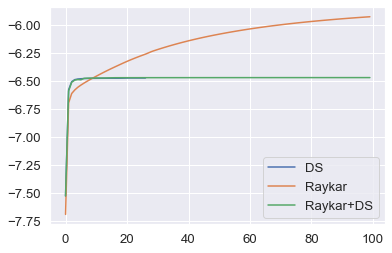

In [30]:
reload_all()
toloka_methods, toloka_points, advantages_matrix = bm.compare_methods(toloka_data, max_iter=100, lr=200)
# [('DS', 0.786074672048436), ('Raykar', 0.7790110998990918)]

Number of data points: 991


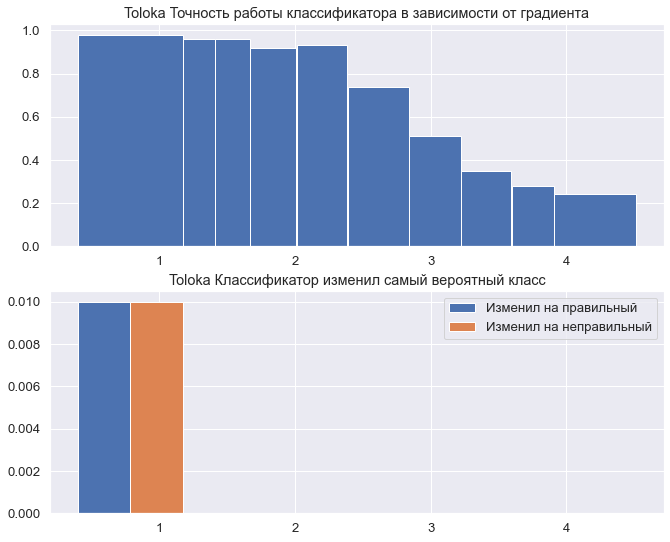

In [26]:
buckets, confidences, wrong, correct = bm.build_grad_hist(toloka_data, toloka_methods, toloka_points, 'Toloka', 100)
condidence_toloka = bm.get_confidence(buckets[0], confidences[0])

Iter 00, logit: -7.527987
Iter 10, logit: -6.476093
Iter 20, logit: -6.473538
[0.14983006 0.10479651 0.40837706 0.067598   0.26939837]
---------------
w225 [0. 1. 0. 0. 0.]
w225 [7.73783186e-34 5.03642757e-02 9.49635724e-01 0.00000000e+00
 0.00000000e+00]
w60 [0. 1. 0. 0. 0.]
w60 [1.04904741e-27 0.00000000e+00 9.24727758e-01 5.01814948e-02
 2.50907474e-02]
w745 [0.         0.85479902 0.14520098 0.         0.        ]
w745 [0.04855507 0.04855507 0.90288987 0.         0.        ]
w690 [0.  0.5 0.5 0.  0. ]
w690 [0.10072855 0.05036428 0.84890717 0.         0.        ]
w670 [0. 1. 0. 0. 0.]
w670 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
 1.70177067e-42]
Label accuracy is 0.7719475277497477
--------------------------------------------------
Data has 53 features
Iter 00, logit: -7.690479
Iter 10, logit: -6.457190
Iter 20, logit: -6.324834
Iter 30, logit: -6.218816
Iter 40, logit: -6.141410
Iter 50, logit: -6.081955
Iter 60, logit: -6.035355
Iter 70, logit: -5.998403
Iter 8

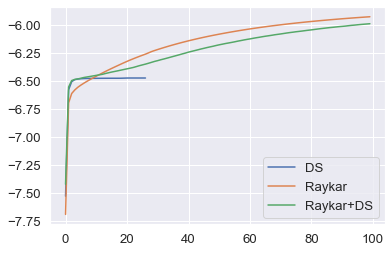

In [28]:
reload_all()
toloka_methods, toloka_points, advantages_matrix = bm.compare_methods(toloka_data, max_iter=100, lr=200, 
                                                                      confidence_estimator=condidence_toloka)

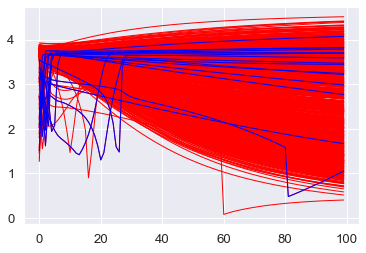

In [21]:
reload_all()
bm.plot_all_gradients(toloka_points,
                              toloka_points[toloka_points.task.isin(advantages_matrix[0][1])], 'Toloka') 

In [20]:
toloka_points[toloka_points.task.isin(advantages_matrix[1][0])]

,task,mu_ds,conf_mx_ds,mu_r,conf_mx_r,classifier_r,grad_r
64,t110,"[0.0, 0.0, 1.0, 0.0, 0.0]","[-inf, -inf, -14.692, -inf, -inf]","[0.0, 1.0, 0.0, 0.0, 0.0]","[-inf, -11.17, -inf, -inf, -inf]","[0.091, 0.22, 0.513, 0.096, 0.08]","[1.43557, 3.44223, 3.69672, 3.69293, 3.68908, ..."
143,t189,"[0.0, 0.0, 1.0, 0.0, 0.0]","[-90.598, -inf, -11.989, -inf, -inf]","[1.0, 0.0, 0.0, 0.0, 0.0]","[-11.656, -inf, -inf, -inf, -inf]","[0.179, 0.185, 0.425, 0.09, 0.121]","[1.88051, 2.63994, 3.40738, 3.64216, 3.65045, ..."
167,t210,"[0.0, 0.0, 0.0, 0.0, 1.0]","[-inf, -inf, -inf, -inf, -9.07]","[0.0, 0.0, 0.0, 1.0, 0.0]","[-inf, -inf, -inf, -7.601, -252.944]","[0.257, 0.108, 0.031, 0.157, 0.447]","[2.2377, 3.52525, 3.74784, 3.76373, 3.76428, 3..."
177,t22,"[0.0, 0.0, 1.0, 0.0, 0.0]","[-338.774, -16.163, -6.443, -inf, -inf]","[0.0, 1.0, 0.0, 0.0, 0.0]","[-inf, -4.986, -228.16, -inf, -inf]","[0.345, 0.138, 0.094, 0.191, 0.232]","[2.74032, 1.93689, 2.42451, 3.4544, 3.6694, 3...."
730,t751,"[1.0, 0.0, 0.0, 0.0, 0.0]","[-11.051, -inf, -497.692, -inf, -inf]","[0.032, 0.0, 0.968, 0.0, 0.0]","[-14.141, -inf, -11.941, -inf, -inf]","[0.132, 0.179, 0.448, 0.116, 0.126]","[3.72203, 3.55236, 3.15511, 2.91933, 2.78403, ..."


In [14]:
bm.plots_for_point(toloka_points, toloka_data, toloka_methods, 62)

Annotation(annotator='w225', task='t109', value='2')
Annotation(annotator='w60', task='t109', value='3')
Annotation(annotator='w745', task='t109', value='2')
Annotation(annotator='w690', task='t109', value='3')
Annotation(annotator='w670', task='t109', value='3')


IndexError: list index out of range

<Figure size 720x432 with 0 Axes>

0.9949545913218971
0.651


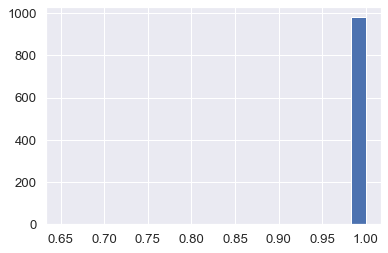

In [8]:
def build_conf_hist(points, name):
    max_confidence = np.array(list(map(lambda x: x.max(), points[name].values)))
    plt.hist(max_confidence, bins=20)
    print((max_confidence > 0.95).mean())
    print(max_confidence.min())
build_conf_hist(toloka_points, 'mu_ds')

/miniconda3/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


5 16


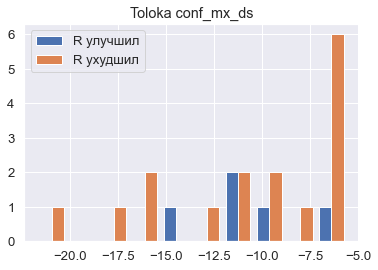

In [29]:
reload_all()
bm.plot_flips(toloka_points[toloka_points.task.isin(advantages_matrix[1][0])], 
              toloka_points[toloka_points.task.isin(advantages_matrix[0][1])], 'conf_mx_ds', 'Toloka', 'R улучшил', 'R ухудшил')